In [ ]:
!pip install git+https://github.com/kryptonite0/python-long-weekends
!pip install holidays
!pip install calmap

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import holidays as holidays_api
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.cm import get_cmap
import calmap
import numpy as np

from long_weekends.long_weekends import spot_holiday_bridges

In [2]:
start = '2021-01-01'
end = '2021-12-31'
holidays = holidays_api.CH(prov='TI', years=[2020, 2021, 2022])
bridges, long_weekends = spot_holiday_bridges(start=start, end=end, holidays=holidays)

In [3]:
bridges

[Timestamp('2021-05-14 00:00:00'),
 Timestamp('2021-06-04 00:00:00'),
 Timestamp('2021-06-28 00:00:00')]

In [4]:
long_weekends

[Timestamp('2021-01-01 00:00:00'),
 Timestamp('2021-01-02 00:00:00'),
 Timestamp('2021-01-03 00:00:00'),
 Timestamp('2021-03-19 00:00:00'),
 Timestamp('2021-03-20 00:00:00'),
 Timestamp('2021-03-21 00:00:00'),
 Timestamp('2021-04-02 00:00:00'),
 Timestamp('2021-04-03 00:00:00'),
 Timestamp('2021-04-04 00:00:00'),
 Timestamp('2021-04-05 00:00:00'),
 Timestamp('2021-05-13 00:00:00'),
 Timestamp('2021-05-14 00:00:00'),
 Timestamp('2021-05-15 00:00:00'),
 Timestamp('2021-05-16 00:00:00'),
 Timestamp('2021-05-22 00:00:00'),
 Timestamp('2021-05-23 00:00:00'),
 Timestamp('2021-05-24 00:00:00'),
 Timestamp('2021-06-03 00:00:00'),
 Timestamp('2021-06-04 00:00:00'),
 Timestamp('2021-06-05 00:00:00'),
 Timestamp('2021-06-06 00:00:00'),
 Timestamp('2021-06-26 00:00:00'),
 Timestamp('2021-06-27 00:00:00'),
 Timestamp('2021-06-28 00:00:00'),
 Timestamp('2021-06-29 00:00:00'),
 Timestamp('2021-10-30 00:00:00'),
 Timestamp('2021-10-31 00:00:00'),
 Timestamp('2021-11-01 00:00:00')]

<AxesSubplot:>

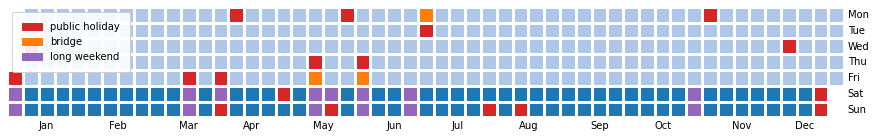

In [15]:
fig, ax = plt.subplots(figsize=(15, 5), facecolor='w')
idx = pd.date_range(start, end)
sr = pd.Series(np.zeros(len(idx)) + 0.055, index=idx)
sr.loc[sr.index.dayofweek.isin([5, 6])] = 0.
sr.loc[sr.index.isin(long_weekends)] = 0.41
longwe_patch = mpatches.Patch(color=get_cmap('tab20')(0.41), label='long weekend')
sr.loc[sr.index.isin(bridges)] = 0.11
bridge_patch = mpatches.Patch(color=get_cmap('tab20')(0.11), label='bridge')
sr.loc[sr.index.isin(holidays)] = 0.31
holiday_patch = mpatches.Patch(color=get_cmap('tab20')(0.31), label='public holiday')

plt.legend(handles=[holiday_patch, bridge_patch, longwe_patch], loc='upper left', borderpad=1, framealpha=0.9)
calmap.yearplot(sr, ax=ax, cmap='tab20', linewidth=3, vmin=0, vmax=1)